In [1]:
import numpy as np
import pandas as pd
from possibilearn import *
from possibilearn.kernel import GaussianKernel
from clustering import *
import math
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#sample generator
def g(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))


def gr_membership_graded(estimated_membership, color_map):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    plt.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=color_map, alpha=0.99, extent=(-4, 4, -4, 4))
    
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .7, .8, .9, .95), colors='k')
    plt.clabel(membership_contour, inline=1)

def gr_dataset(): 
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'green', 'red')):
        plt.scatter(iris_values_2d[iris_labels==lab, 0],
                    iris_values_2d[iris_labels==lab, 1],
                    label=lab,
                    c=col)

def get_different_clusters(clusters, clusters_index, clusters_labels):
    d={}
    c=[]
    l=[]
    i=[]
    for j in range(len(clusters_labels)):
        if clusters_labels[j] not in d:
            d[clusters_labels[j]] = True
            c.append(clusters[j])
            l.append(clusters_labels[j])
            i.append(clusters_index[j])
    return c, i, l
        

source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(
    filepath_or_buffer=source,
    header=None,
    sep=',')

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # drops the empty line at file-end

iris_values = iris_df.iloc[:,:4].values
iris_labels = iris_df.iloc[:,4].values 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris_values_std = StandardScaler().fit_transform(iris_values)

pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)

In [2]:
sigmas = np.array([0.222])
cs = np.array([0.1])
couples = [(c,s) for s in sigmas for c in cs]



holdout iteration 0

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  0.866666666667
accuracy of the best couple on training set is  0.822222222222

Iris-versicolor


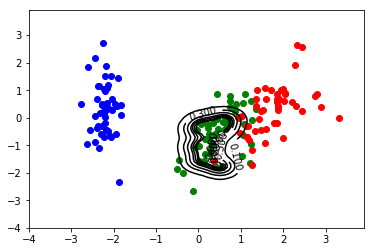

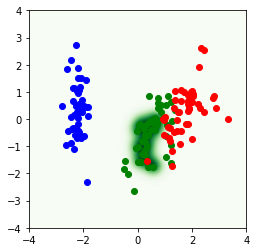


Iris-virginica


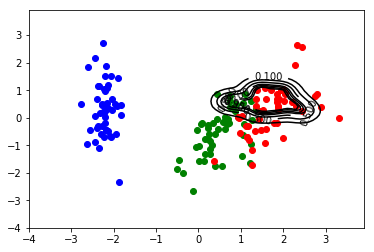

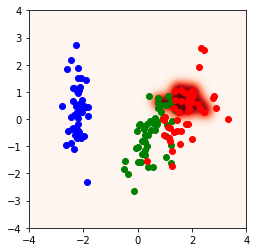


Iris-setosa


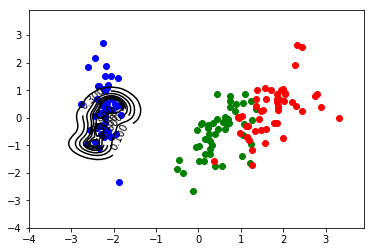

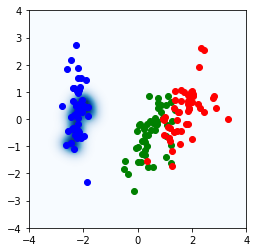



holdout iteration 1

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  0.733333333333
accuracy of the best couple on training set is  0.837037037037

Iris-virginica


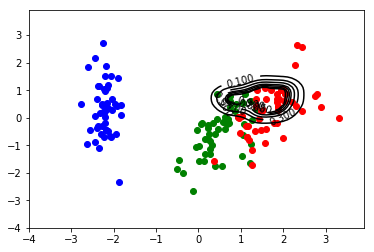

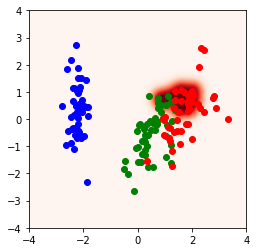


Iris-setosa


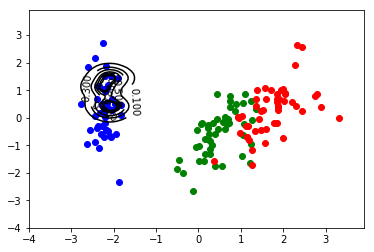

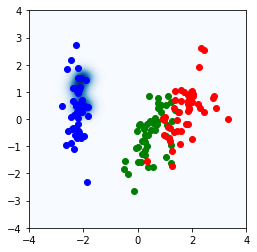


Iris-versicolor


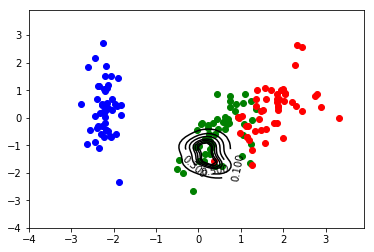

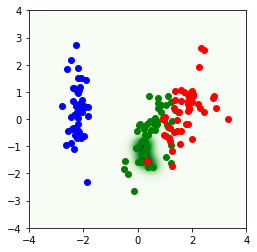



holdout iteration 2

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  0.8
accuracy of the best couple on training set is  0.844444444444

Iris-setosa


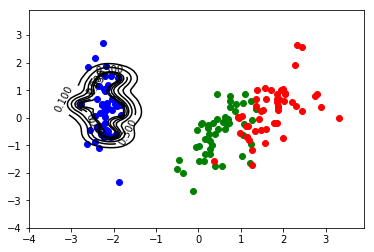

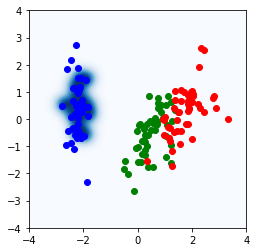


Iris-versicolor


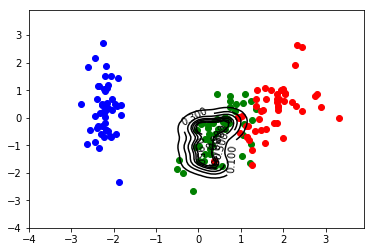

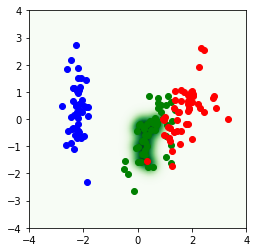


Iris-virginica


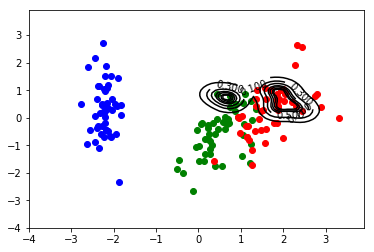

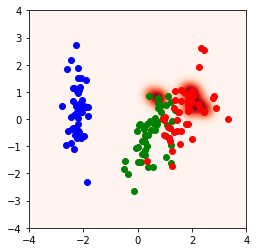



holdout iteration 3

starting training with best couple:  (0.1, 0.222)
starting clusterization
not enough clusters


holdout iteration 3

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  1.0
accuracy of the best couple on training set is  0.822222222222

Iris-setosa


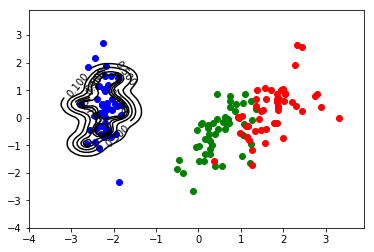

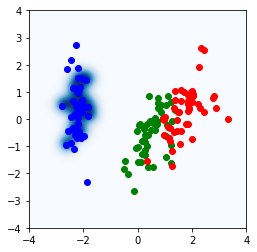


Iris-virginica


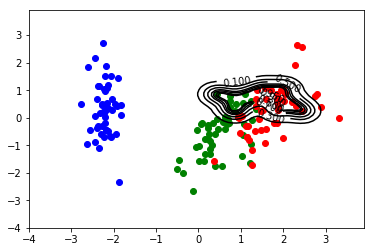

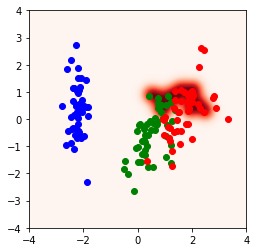


Iris-versicolor


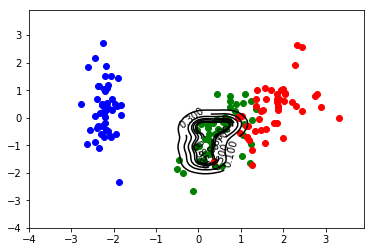

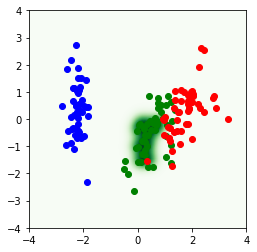



holdout iteration 4

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  0.933333333333
accuracy of the best couple on training set is  0.822222222222

Iris-setosa


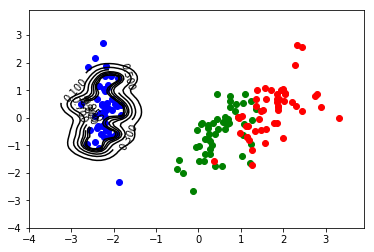

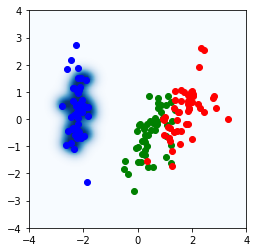


Iris-virginica


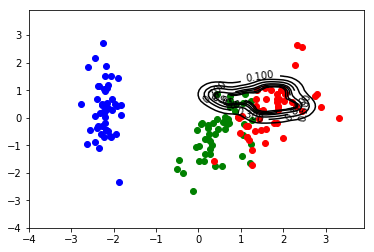

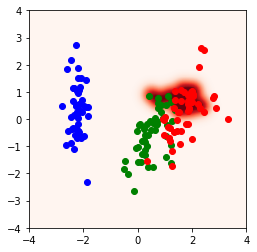


Iris-versicolor


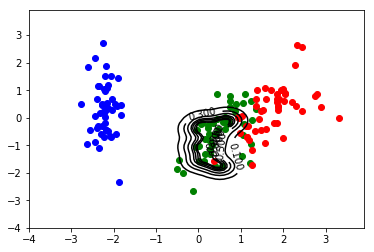

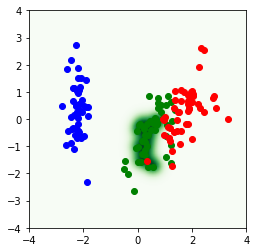



holdout iteration 5

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
unable to infer an estimated membership function


holdout iteration 5

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  0.6
accuracy of the best couple on training set is  0.562962962963

Iris-setosa


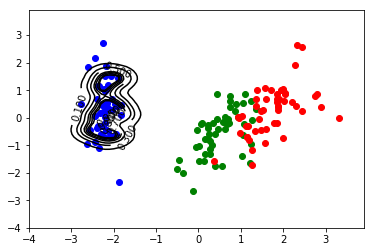

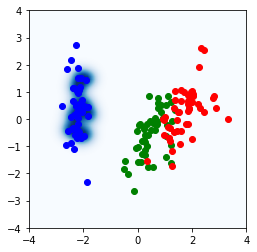


Iris-virginica


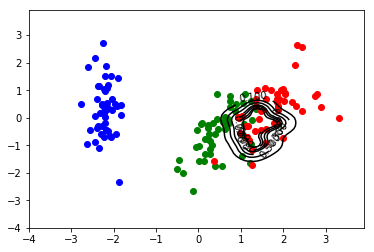

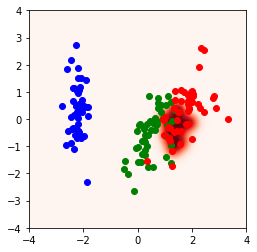


Iris-versicolor


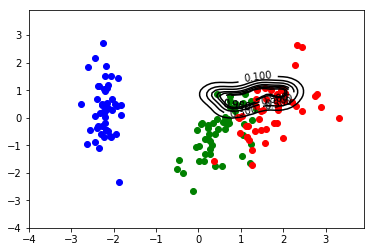

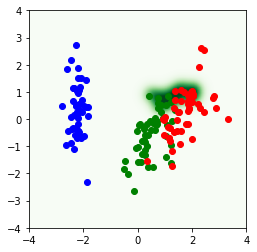



holdout iteration 6

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  0.933333333333
accuracy of the best couple on training set is  0.822222222222

Iris-setosa


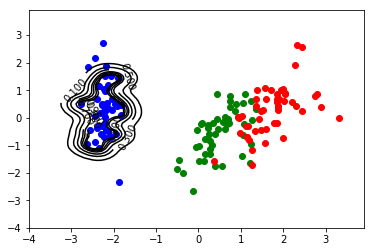

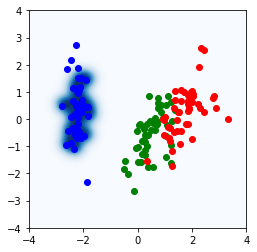


Iris-virginica


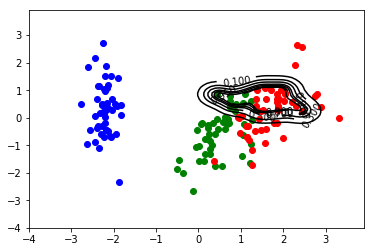

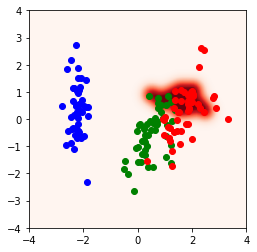


Iris-versicolor


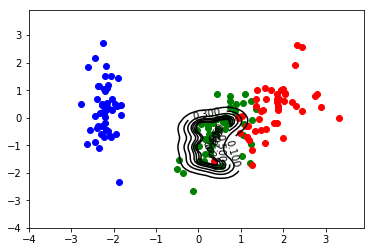

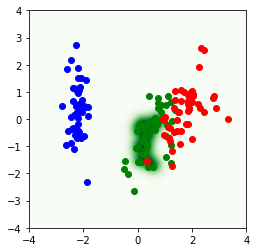



holdout iteration 7

starting training with best couple:  (0.1, 0.222)
starting clusterization
not enough clusters


holdout iteration 7

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
unable to infer an estimated membership function


holdout iteration 7

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  0.733333333333
accuracy of the best couple on training set is  0.859259259259

Iris-setosa


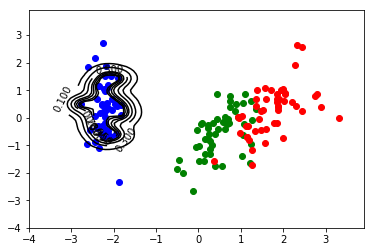

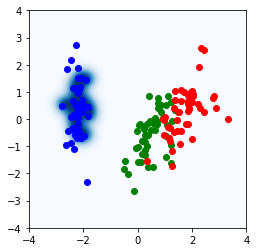


Iris-versicolor


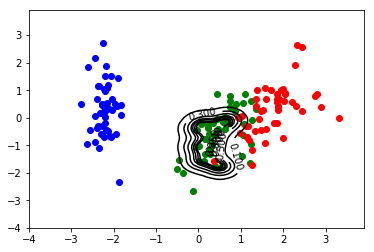

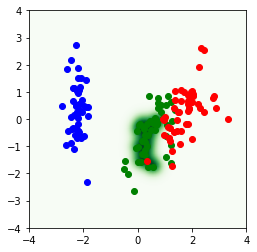


Iris-virginica


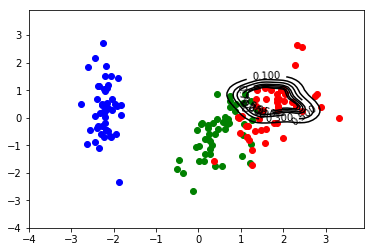

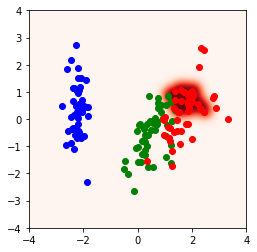



holdout iteration 8

starting training with best couple:  (0.1, 0.222)
starting clusterization
not enough clusters


holdout iteration 8

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  0.866666666667
accuracy of the best couple on training set is  0.851851851852

Iris-versicolor


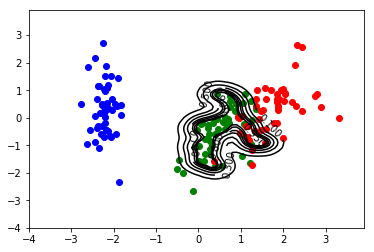

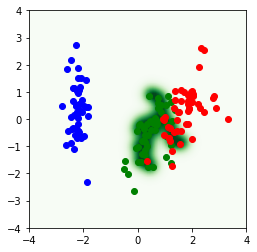


Iris-setosa


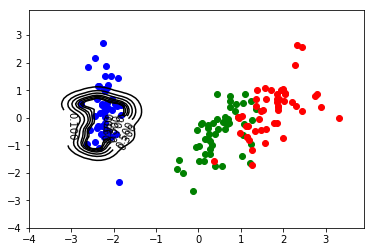

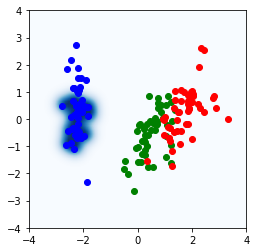


Iris-virginica


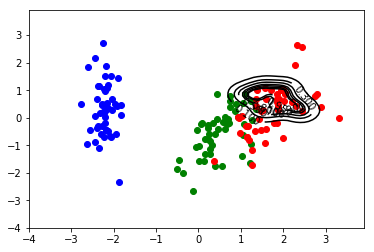

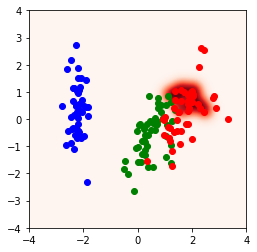



holdout iteration 9

starting training with best couple:  (0.1, 0.222)
starting clusterization
got enough clusters
labelled clusters  ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
inferring membership 0
inferring membership 1
inferring membership 2
validating test
the test is valid
accuracy of the best couple on test set is  0.933333333333
accuracy of the best couple on training set is  0.814814814815

Iris-virginica


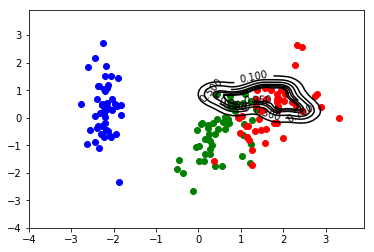

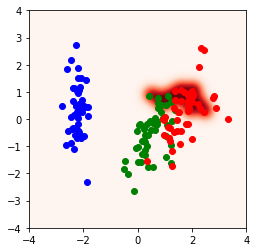


Iris-versicolor


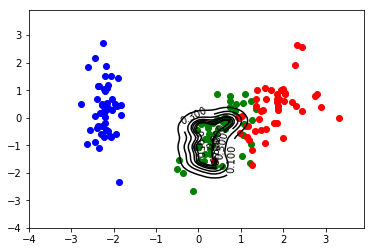

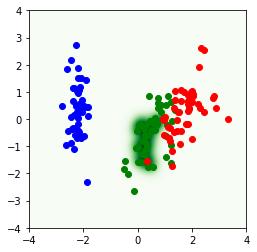


Iris-setosa


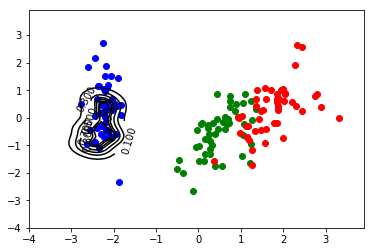

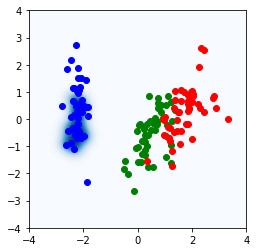

accuracy for the valid tests {(8, 0.1, 0.222): 0.8666666666666667, (2, 0.1, 0.222): 0.8, (5, 0.1, 0.222): 0.6, (6, 0.1, 0.222): 0.9333333333333333, (9, 0.1, 0.222): 0.9333333333333333, (0, 0.1, 0.222): 0.8666666666666667, (7, 0.1, 0.222): 0.7333333333333333, (1, 0.1, 0.222): 0.7333333333333333, (3, 0.1, 0.222): 1.0, (4, 0.1, 0.222): 0.9333333333333333}


In [3]:
n = len(iris_values_2d)
iterations = 10

validation_accuracy={}
test_accuracy={}
training_accuracy={}
valid_iteration = 0
while(valid_iteration < iterations):
    
    
    print '\n\nholdout iteration {}'.format(valid_iteration)
    
    #random permutation of train validation and test sets
    permutation = np.random.permutation(range(n))
    perc_train, perc_val, perc_test = (.8, .1, .1)
    train_index = permutation[:int(n*perc_train)]
    validation_index = permutation[int(n*perc_train):int(n*(perc_train+perc_val))]
    test_index = permutation[int(n*(perc_train+perc_val)):]
    train_set = iris_values_2d[[i for i in train_index]]
    validation_set = iris_values_2d[[i for i in validation_index]]
    test_set = iris_values_2d[[i for i in test_index]]
    
    '''
    # find the couple that have the best accuracy for this permutation
    best_couple = (-1,-1) #initialization of best couple
    best_accuracy = -1 #initialization of best accuracy
    
    for (c, sigma) in couples:
        print '\nmodel selection: trying parameters c={}, sigma={}'.format(c, sigma)
        print 'starting clusterization'
        try:
            clusters_index, r = clustering(train_set, sigma, c)
            clusters_index = [cl for cl in clusters_index if len(cl) > 1] #exclude singleton clusters
            
            #sort clusters 
            clusters_index.sort(key = lambda x: -len(x))
            
            #clusters_index = clusters_index[:3]
            
            clusters = [train_set[cl] for cl in clusters_index] #get the clusters with the points
            
            clusters_labels = [pd.Series([iris_labels[train_index[i]] for i in clusters_index[k]])
                          .mode()[0] for k in range(len(clusters))] #associate clusters with labels
            #print 'first labels: ', clusters_labels
            
            clusters, clusters_index, clusters_labels = get_different_clusters(clusters, clusters_index, clusters_labels)
            
            #print 'second labels: ',clusters_labels   
                
                
            #the clusters must be 3 and represent the 3 different labels
            if len(clusters) == 3 and len(set(clusters_labels)) == 3:
                print 'got enough clusters'
                print 'labelled clusters ', clusters_labels
                
                cluster_indices = [clusters_index[cluster_id] for cluster_id in range(3)]
                mus = [[1 if i in cc else 0 for i in range(int(n*perc_train))] for cc in cluster_indices]
                
                estimated_memberships = []
                for i in range(3):
                    print 'inferring membership {}'.format(i)
                    estimated_membership, _ = possibility_learn(train_set,
                                                      mus[i],
                                                      c=c,
                                                      k=GaussianKernel(sigma),
                                                      sample_generator=g)
                    estimated_memberships.append(estimated_membership)
                
                if not (None in estimated_memberships):
                    
                    print 'validating model'

                    guessed_labels = np.array([clusters_labels[np.argmax([e(t) for e in estimated_memberships])] 
                                       for t in validation_set])

                    correct_labels = np.array(iris_labels[validation_index])
                    #print 'correct labels: ', correct_labels
                    #print 'guessed labels: ', guessed_labels
                    accuracy = float(sum(guessed_labels == correct_labels)) / len(validation_set)
                    print 'accuracy', accuracy
                    
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_couple = c, sigma
                    
                else:
                    print 'unable to infer an estimated membership function'
                    continue
                            
            else:
                print 'not enough clusters'
                continue
            
        except ValueError as e:
            print str(e)
    '''       
    c_best, sigma_best = best_couple = (0.1, 0.222)
    if c_best > 0 and sigma_best > 0:
        
        #with the couple with the best accuracy infer the membership function merging train and validation set
        new_train_set = np.vstack((train_set, validation_set))
        new_train_index = np.hstack((train_index, validation_index))
        
        print '\nstarting training with best couple: ', best_couple 
        print 'starting clusterization'
        
        try:
            clusters_index, r = clustering(new_train_set, sigma_best, c_best)
            clusters_index = [cl for cl in clusters_index if len(cl) > 1] #exclude singleton clusters
            
            #sort clusters 
            clusters_index.sort(key = lambda x: -len(x))
            
            #clusters_index = clusters_index[:3]
            clusters = [new_train_set[cl] for cl in clusters_index] #get the clusters with the points
            
            clusters_labels = [pd.Series([iris_labels[new_train_index[i]] for i in clusters_index[k]])
                          .mode()[0] for k in range(len(clusters))] #associate clusters with labels
            
            clusters, clusters_index, clusters_labels = get_different_clusters(clusters, clusters_index, clusters_labels)
                     
            #the clusters must be 3 and represent the 3 different labels
            if len(clusters) == 3 and len(set(clusters_labels)) == 3:
                print 'got enough clusters'
                print 'labelled clusters ', clusters_labels
                
                cluster_indices = [clusters_index[cluster_id] for cluster_id in range(3)]
                mus = [[1 if i in cc else 0 for i in range(int(n*(perc_train+perc_val)))] for cc in cluster_indices]
                
                estimated_memberships = []
                for i in range(3):
                    print 'inferring membership {}'.format(i)
                    estimated_membership, _ = possibility_learn(new_train_set,
                                                      mus[i],
                                                      c=c_best,
                                                      k=GaussianKernel(sigma_best),
                                                      sample_generator=g)
                    estimated_memberships.append(estimated_membership)
                    
                print 'validating test'
                if not (None in estimated_memberships):
                    
                    print 'the test is valid'
                    
                    #compute the accuracy on test set
                    guessed_labels = np.array([clusters_labels[np.argmax([e(t) for e in estimated_memberships])] 
                                       for t in test_set])

                    correct_labels = np.array(iris_labels[test_index])
                    #print 'correct labels: ', correct_labels
                    #print 'guessed labels: ', guessed_labels
                    accuracy = float(sum(guessed_labels == correct_labels)) / len(test_set)
                    print 'accuracy of the best couple on test set is ', accuracy
                    
                    test_accuracy[(valid_iteration, c_best, sigma_best)] = accuracy
                    
                    #compute the accuracy on training set
                    guessed_labels = np.array([clusters_labels[np.argmax([e(t) for e in estimated_memberships])] 
                                       for t in new_train_set])

                    correct_labels = np.array(iris_labels[new_train_index])
                    #print 'correct labels: ', correct_labels
                    #print 'guessed labels: ', guessed_labels
                    accuracy = float(sum(guessed_labels == correct_labels)) / len(new_train_set)
                    print 'accuracy of the best couple on training set is ', accuracy
                    
                    training_accuracy[(valid_iteration, c_best, sigma_best)] = accuracy
                    valid_iteration = valid_iteration +1
                    
                    #print graphs
                    %matplotlib inline
                    for i in range(3):
                        print "\n", clusters_labels[i]
                        gr_dataset()
                        gr_membership_contour(estimated_memberships[i])
                        plt.show()
                    
                        if clusters_labels[i] == 'Iris-setosa':
                            col = cm.Blues
                        elif clusters_labels[i] == 'Iris-virginica':
                            col = cm.Reds
                        else:
                            col = cm.Greens
                            
                        gr_membership_graded(estimated_memberships[i], col)
                        gr_dataset()
                        plt.show()
                    
                else:
                    print 'unable to infer an estimated membership function'
                    continue
                            
            else:
                print 'not enough clusters'
                continue
            
        except ValueError as e:
            print str(e)
    
    else:
        print'this permutation has not produced a best couple'
        
        
print 'accuracy for the valid tests', test_accuracy

In [4]:
print 'accuracy mean for the training set: ', np.array(training_accuracy.values()).mean()
print 'accuracy std deviation for the training set: ', np.array(training_accuracy.values()).std()

print 'accuracy mean for the test set: ', np.array(test_accuracy.values()).mean()
print 'accuracy std deviation for the test set: ', np.array(test_accuracy.values()).std()

accuracy mean for the training set:  0.8059259259259258
accuracy std deviation for the training set:  0.08220553717928936
accuracy mean for the test set:  0.8400000000000001
accuracy std deviation for the test set:  0.11623730516108463
